In this checkpoint, I am working on the 'Electric Vehicle Data' dataset that was provided by Kaggle as part of the Electric Vehicle Price Prediction competition.

Dataset description: This dataset contains information on the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered with the Washington State Department of Licensing (DOL). This dataset was introduced as part of an official invitation-based competition on Kaggle. Our SVM model should answer the question "This is my car's model & make, along with a few other parameters, what price can this vehicle be brought or sold?”

➡️ Dataset link

https://i.imgur.com/IpuCW3s.jpg

➡️Columns explanation 

 


Instructions

Import you data and perform basic data exploration phase
Display general information about the dataset
Create a pandas profiling reports to gain insights into the dataset
Handle Missing and corrupted values
Remove duplicates, if they exist
Handle outliers, if they exist
Encode categorical features
Select your target variable and the features
Split your dataset to training and test sets
Build and train an SVM model on the training set
Assess your model performance on the test set using relevant evaluation metrics
Discuss with your cohort alternative ways to improve your model performance

In [16]:

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [17]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

## Basic Data Exploration Phase

In [18]:
# mLoading the dataset
vehicle_df = pd.read_csv(r"C:\Users\Zione\Downloads\Electric_cars_dataset.csv")

In [19]:
# Dataset Overview
vehicle_df.head()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


In [20]:
#Checking the dimensions of the dataframe,rows and columns
vehicle_df.shape

(64353, 18)

In [21]:
#Descriptive statistics of the dataset
vehicle_df.describe()

,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
count,64347.000000,64346.000000,64353.000000,64353.000000,64184.000000,6.435300e+04
mean,98143.452888,2018.186212,106.948985,2524.990754,29.951904,1.972905e+08
std,2856.064329,2.726742,104.093919,12402.895104,14.661124,1.069466e+08
min,745.000000,1993.000000,0.000000,0.000000,0.000000,4.385000e+03
25%,98052.000000,2017.000000,14.000000,0.000000,19.000000,1.372865e+08
50%,98121.000000,2018.000000,73.000000,0.000000,34.000000,1.753776e+08
75%,98370.000000,2021.000000,215.000000,0.000000,43.000000,2.299039e+08
max,99701.000000,2022.000000,337.000000,845000.000000,49.000000,4.789346e+08


In [22]:
# SHOWING CONCISE INFO OF THE DATASET
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [23]:
vehicle_df["Expected Price ($1k)"].unique()

array(['50', '15', '18', '33.9', '41.78', '16.365', '31.5', '65', '19',
       '27', '40', '39.9', '41.5', '25.004', '73', '79.596', '72', '39',
       '16', '33', '64', '69', '16.251', '29.998', '20.004', '13.9', '35',
       '102', '54', '78', '38', '21', '85', '45.6', '57', '69.2', '20',
       '14.5', '24.283', '22.2', '36.98', '73.9', '28', '60.2', '26.22',
       '25', '60', '43', '17', '20.5', '10.042', '31.67', '36.6', '33.89',
       '136.8', '21.998', '13.3', '30', '18.5', '22.857', '15.6', '27.4',
       '18.058', '30.8', '42.8', '142', '9.035', '63.4', '37.413', '42',
       '62', '59.979', '11.75', '80', '13.115', '70', '22.3', '38.5',
       '16.5', '29.49', '21.3', '18.374', '95', '40.9', '90', '22',
       '82.5', '20.6', '20.9', '28.2', '34.5', '32.1', '36.5', '45',
       '30.152', '96', '24', '46.5', '23', '37.3', '37', '67.07', '51.57',
       '26', '105', '5.499', '18.6', '65.9', '21.9', '7', '119.8',
       '21.258', '8.9', '24.69', '15.5', '16.999', '18.86', '30.

In [24]:


# Replace 'N/', 'NA', and empty strings with NaN
vehicle_df["Expected Price ($1k)"] = vehicle_df["Expected Price ($1k)"].replace(['N/', 'NA', ''], np.nan)

# Convert the column to numeric, coercing errors to NaN
vehicle_df["Expected Price ($1k)"] = pd.to_numeric(vehicle_df["Expected Price ($1k)"], errors='coerce')


## Checking for missing values and duplicates

In [25]:
vehicle_df.isnull().sum()

ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               6
Model Year                                             7
Make                                                   4
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                     510
Electric Utility                                     722
Expected Price ($1k)           

In [26]:
vehicle_df[vehicle_df[ "Expected Price ($1k)"].isnull()]

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
2714,EV35011,1FMCU0LZ4N,King,YARROW POINT,WA,98004.0,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,48.0,192602371,POINT (-122.203169 47.619011),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),NaN
4081,EV55301,1FMCU0KZ4N,Island,OAK HARBOR,WA,98277.0,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,10.0,193046381,POINT (-122.63841 48.310313),PUGET SOUND ENERGY INC,NaN
13866,EV20774,1FMCU0LZ2N,Jefferson,PORT LUDLOW,WA,98365.0,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,24.0,190318901,POINT (-122.69441 47.905058),BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...,NaN
14787,EV21204,1FMCU0KZ2N,Clark,CAMAS,WA,98607.0,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,18.0,195263764,POINT (-122.408498 45.620943),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,NaN
16164,EV68630,1FMCU0KZ9N,King,BELLEVUE,WA,98006.0,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,41.0,187155314,POINT (-122.151342 47.560192),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),NaN
22827,EV51468,1FMCU0KZ3N,King,SEATTLE,WA,98103.0,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,36.0,192317646,POINT (-122.343577 47.672491),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),NaN
26799,EV42602,1FMCU0EZ0N,Pierce,GIG HARBOR,WA,98332.0,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,26.0,195845597,POINT (-122.599454 47.36582),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,NaN
28511,EV51868,1FMCU0KZ1N,Clark,CAMAS,WA,98607.0,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,18.0,192539574,POINT (-122.408498 45.620943),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,NaN
31081,EV41495,1FMCU0EZ4N,Pierce,TACOMA,WA,98444.0,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,29.0,192962717,POINT (-122.447791 47.1543),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,NaN
37957,EV35977,1FMCU0LZ5N,Clark,VANCOUVER,WA,98662.0,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,49.0,193422764,POINT (-122.576308 45.677838),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,NaN


In [27]:
vehicle_df.dropna(subset=["Expected Price ($1k)"], inplace=True)

In [30]:
vehicle_df = vehicle_df.dropna( )

In [29]:
vehicle_df.isnull().sum()

ID                                                   0
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
ZIP Code                                             0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
Expected Price ($1k)                                 0
dtype: int

In [31]:
vehicle_df.duplicated().sum()

0

There are no duplicates in the dataset given

In [32]:
vehicle_df.shape

(63081, 18)

In [33]:
vehicle_df["Make"].value_counts()

Make
TESLA                   27398
NISSAN                   8548
CHEVROLET                6494
FORD                     3752
KIA                      3005
BMW                      2649
TOYOTA                   2633
AUDI                     1236
VOLKSWAGEN               1183
CHRYSLER                 1069
HYUNDAI                   871
VOLVO                     676
FIAT                      549
HONDA                     517
PORSCHE                   453
JEEP                      423
MITSUBISHI                370
MINI                      295
MERCEDES-BENZ             242
SMART                     190
POLESTAR                  162
JAGUAR                    138
CADILLAC                   67
LINCOLN                    59
SUBARU                     32
LAND ROVER                 26
RIVIAN                     26
FISKER                     10
LUCID MOTORS                2
AZURE DYNAMICS              2
TH!NK                       1
DODGE                       1
WHEEGO ELECTRIC CARS        1
BENTL

In [34]:
vehicle_df["Model"].value_counts()

Model
MODEL 3                 12889
LEAF                     8548
MODEL Y                  7483
MODEL S                  4629
VOLT                     3326
                        ...  
A8 E                        1
LIFE                        1
BENTAYGA                    1
918 SPYDER                  1
PRIUS PLUG-IN HYBRID        1
Name: count, Length: 107, dtype: int64

In [35]:
vehicle_df["Make"].unique()

array(['TESLA', 'NISSAN', 'BMW', 'CHEVROLET', 'HYUNDAI', 'VOLKSWAGEN',
       'LAND ROVER', 'AUDI', 'KIA', 'TOYOTA', 'JEEP', 'CHRYSLER',
       'JAGUAR', 'FORD', 'HONDA', 'POLESTAR', 'SUBARU', 'VOLVO', 'FIAT',
       'SMART', 'PORSCHE', 'MINI', 'MITSUBISHI', 'MERCEDES-BENZ',
       'LINCOLN', 'TH!NK', 'CADILLAC', 'DODGE', 'RIVIAN', 'FISKER',
       'LUCID MOTORS', 'AZURE DYNAMICS', 'WHEEGO ELECTRIC CARS',
       'BENTLEY'], dtype=object)

In [36]:
vehicle_df["Model"].unique()

array(['MODEL 3', 'LEAF', 'I3', 'VOLT', 'BOLT EV',
       'SONATA PLUG-IN HYBRID', 'MODEL S', 'ID.4', 'MODEL Y',
       'RANGE ROVER SPORT', 'Q5 E', 'NIRO', 'SOUL EV', 'SPARK', 'MODEL X',
       'RAV4 PRIME', 'WRANGLER', 'PACIFICA', 'Q5', 'I-PACE', 'C-MAX',
       'FUSION', 'CLARITY', 'E-GOLF', 'X5', 'I8', 'PRIUS PRIME', 'PS2',
       'CROSSTREK HYBRID AWD', 'XC60 AWD PHEV', '500', 'E-TRON',
       'PRIUS PLUG-IN', 'A3', 'FOCUS', 'MACH-E', '330E', 'F-150', 'X3',
       'FORTWO ELECTRIC DRIVE', 'PANAMERA', 'NIRO ELECTRIC',
       'KONA ELECTRIC', 'SORENTO', 'XC40', 'EV6', 'NIRO PLUG-IN HYBRID',
       'HARDTOP', 'OUTLANDER', 'RAV4', 'GLC-CLASS', 'CAYENNE', 'XC90',
       'COUNTRYMAN', 'SANTA FE', 'XC60 AWD', 'SONATA', 'S60', 'AVIATOR',
       'B-CLASS', 'CITY', 'RS E-TRON', 'ELR', 'TAYCAN', 'FORTWO', 'SOUL',
       'EQ FORTWO', 'OPTIMA', 'XC60', 'XC90 AWD', 'IONIQ', 'ROADSTER',
       'CARAVAN', 'E-TRON SPORTBACK', 'R1T', 'KONA', '530E XDRIVE',
       'IONIQ 5', '530E', 'I-MIEV', 'GLE-C

### Using the boxplot to see the distribution of prices

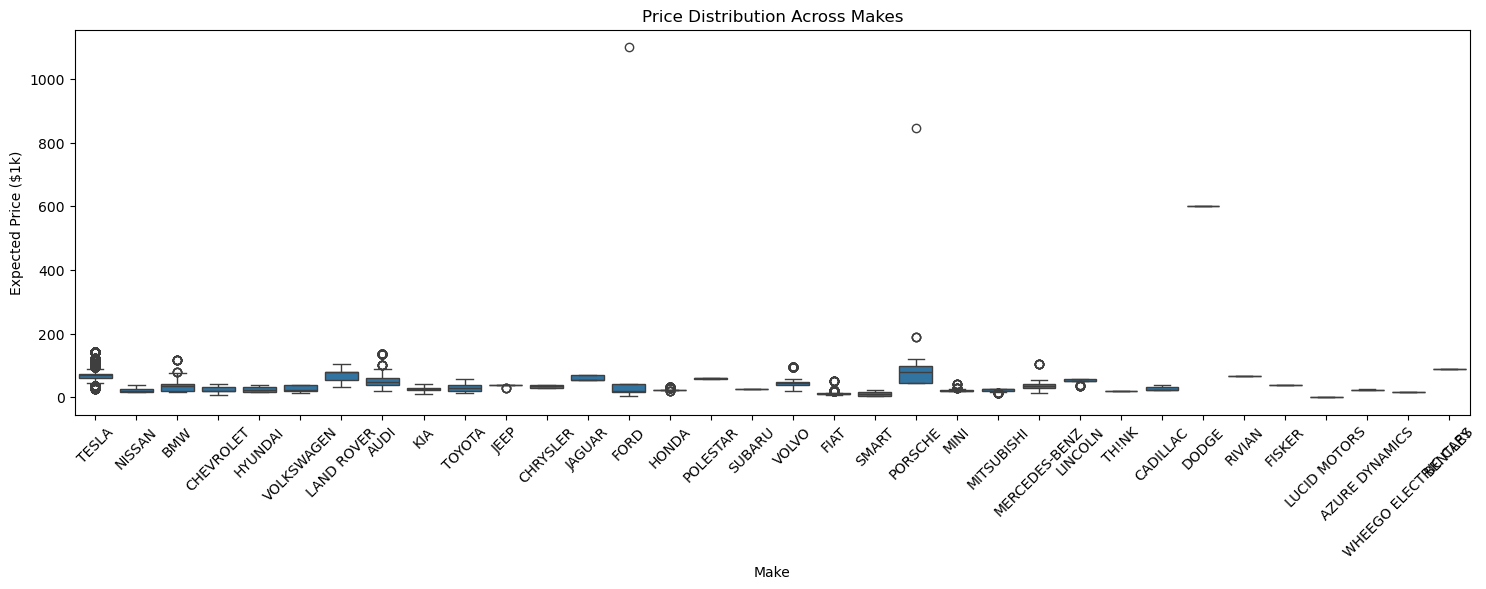

In [37]:
plt.figure(figsize=(18, 5)) 
sns.boxplot(x='Make', y='Expected Price ($1k)', data=vehicle_df)
plt.title('Price Distribution Across Makes')
plt.xticks(rotation=45)
plt.show()

## Feature Engineering

Using Electric Range as a Proxy for Mileage

In [38]:
vehicle_df['Price per Mile'] = vehicle_df['Expected Price ($1k)'] / vehicle_df['Electric Range']


## Changing the datatype of model year

In [39]:
vehicle_df["Model Year"] = vehicle_df["Model Year"].astype(int)

## Age of the Vehicle

In [40]:
current_year = 2024
vehicle_df[ 'Age of Vehicle'] = current_year - vehicle_df['Model Year']

## Encoding categorical features

## Label Encoding method assigns a unique integer to each category

In [41]:
vehicle_df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts()

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle Eligible                         39172
Eligibility unknown as battery range has not been researched    14657
Not eligible due to low battery range                            9252
Name: count, dtype: int64

In [43]:
label_encoder = LabelEncoder()
vehicle_df['(CAFV)_Eligibility_encoded']= label_encoder.fit_transform(vehicle_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility' ])

In [46]:
vehicle_df[ "Electric Vehicle Type"].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            47001
Plug-in Hybrid Electric Vehicle (PHEV)    16080
Name: count, dtype: int64

In [59]:
# Ensure no trailing spaces in column names
vehicle_df.columns = vehicle_df.columns.str.strip()

# Now try encoding again
label_encoder = LabelEncoder()
vehicle_df['EV_Type_encoded'] = label_encoder.fit_transform(vehicle_df['Electric Vehicle Type'])


## Target Encoding will be suitable for Model and Make features since there is a large number of categories and label or one-hot encoding would result in high dimensionality

In [60]:
vehicle_df['Model_encoded' ] = vehicle_df.groupby('Model')['Expected Price ($1k)'].transform('mean')

In [61]:
vehicle_df['Make_encoded'] = vehicle_df.groupby('Make')['Expected Price ($1k)'].transform('mean')

## Combining the datatwrangling steps into one function for a test CSV file

In [62]:
def wrangle(file_path):
# Load the dataset
    vehicle_df = pd.read_csv(file_path)

# Clean and convert 'Expected Price ($1k) to numeric
    vehicle_df["Expected Price ($1k)"] = vehicle_df["Expected Price ($1k)"].replace(['N/', 'NA', ''], np.nan)
    vehicle_df["Expected Price ($1k)"] = pd.to_numeric(vehicle_df["Expected Price ($1k)"], errors='coerce')

# Drop rows with missing values
    vehicle_df = vehicle_df.dropna()

# Create 'Price per Mile' feature, handle divide by zero with np.where
    vehicle_df['Price per Mile'] = np.where(vehicle_df['Electric Range'] == 0, np.nan, vehicle_df['Expected Price ($1k) '] / vehicle_df['Electric Range'])

# Convert 'Model Year' to integer and calculate vehicle age
    vehicle_df["Model Year"] = vehicle_df["Model Year"].astype(int)
    current_year = 2024
    vehicle_df['Age of Vehicle'] = current_year - vehicle_df['Model Year']

# Encode categorical variables
    label_encoder = LabelEncoder ( )
    vehicle_df['(CAFV) Eligibility_encoded'] = label_encoder.fit_transform(vehicle_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
    vehicle_df['EV_Type_encoded'] = label_encoder.fit_transform(vehicle_df["Electric Vehicle Type"])

# Aggregate and encode "Model and Make' based on mean "Expected Price'
    vehicle_df['Model_encoded'] = vehicle_df.groupby('Model')['Expected Price ($1k) '].transform('mean')
    vehicle_df['Make _encoded'] = vehicle_df.groupby('Make') ['Expected Price ($1k) '].transform ("mean")

    return vehicle_df

## Checking relationships between the target vector and the feature matrix

In [64]:
selected_columns = ['Expected Price ($1k)','Model Year', 'Price per Mile', 'Electric Range', "Age of Vehicle", "Base MSRP", 
'Make_encoded', 'EV_Type_encoded', '(CAFV)_Eligibility_encoded']

correlation_matrix = vehicle_df[selected_columns].corr()

In [56]:
print(vehicle_df.columns)


Index(['ID', 'VIN (1-10)', 'County', 'City', 'State', 'ZIP Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', 'Expected Price ($1k)',
       'Price per Mile', 'Age of Vehicle', '(CAFV)_Eligibility_encoded',
       'Model_encoded', 'Make_encoded'],
      dtype='object')


In [65]:
correlation_matrix

,Expected Price ($1k),Model Year,Price per Mile,Electric Range,Age of Vehicle,Base MSRP,Make_encoded,EV_Type_encoded,(CAFV)_Eligibility_encoded
Expected Price ($1k),1.000000,0.537750,0.065326,0.213697,-0.537750,-0.080139,0.823756,-0.398235,-0.054440
Model Year,0.537750,1.000000,0.064622,-0.081397,-1.000000,-0.219215,0.375717,-0.203163,0.202217
Price per Mile,0.065326,0.064622,1.000000,-0.516125,-0.064622,0.162233,-0.075550,0.602248,0.663577
Electric Range,0.213697,-0.081397,-0.516125,1.000000,0.081397,0.053560,0.335486,-0.425891,-0.659253
Age of Vehicle,-0.537750,-1.000000,-0.064622,0.081397,1.000000,0.219215,-0.375717,0.203163,-0.202217
Base MSRP,-0.080139,-0.219215,0.162233,0.053560,0.219215,1.000000,0.054581,0.046238,0.032874
Make_encoded,0.823756,0.375717,-0.075550,0.335486,-0.375717,0.054581,1.000000,-0.402512,-0.090081
EV_Type_encoded,-0.398235,-0.203163,0.602248,-0.425891,0.203163,0.046238,-0.402512,1.000000,0.495997
(CAFV)_Eligibility_encoded,-0.054440,0.202217,0.663577,-0.659253,-0.202217,0.032874,-0.090081,0.495997,1.000000


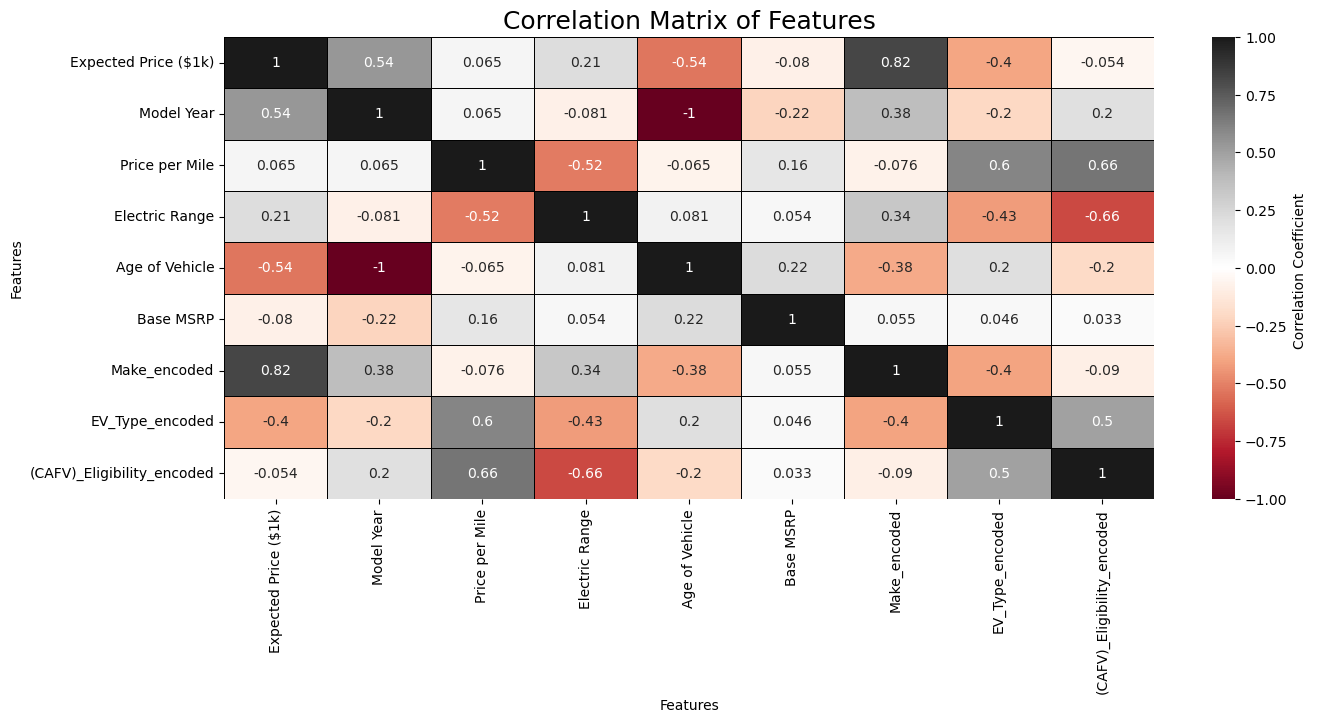

In [70]:
plt.figure(figsize=(15, 6))
sns.heatmap (correlation_matrix,
            annot=True,
            cmap="RdGy",
            linewidths=0.5,
            linecolor= 'black',
            cbar_kws={'label': 'Correlation Coefficient '})
             
plt.title('Correlation Matrix of Features', fontsize=18)
plt.xlabel('Features' , fontsize=10)
plt.ylabel('Features' , fontsize=10)
plt. show()

## Modelling

#### Selecting my features and splitting the data into training and test sets

In [76]:

# Split features (X) and target (y)
X = vehicle_df.drop(columns=["ID", "VIN (1-10)", "Expected Price ($1k)", "Make", "Model", "Price per Mile", "County", "City", "State", "ZIP Code", "Electric Vehicle Type", "Legislative District","DOL Vehicle ID", "Vehicle Location", "Electric Utility", "Clean Alternative Fuel Vehicle (CAFV) Eligibility"]) 
y = vehicle_df['Expected Price ($1k)']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
#Verifying the features
print(X_train.columns)

Index(['Model Year', 'Electric Range', 'Base MSRP', 'Age of Vehicle',
       '(CAFV)_Eligibility_encoded', 'Model_encoded', 'Make_encoded',
       'EV_Type_encoded'],
      dtype='object')


### Scaling my data to ensure that each feature contributes equally to the distance calculations or the optimization process

## Support Vector Machine(SVM)

In [79]:
# Check for NaN values
print(np.isnan(X_train).sum())
# Check for infinite values
print(np.isinf(X_train).sum())

Model Year                    0
Electric Range                0
Base MSRP                     0
Age of Vehicle                0
(CAFV)_Eligibility_encoded    0
Model_encoded                 0
Make_encoded                  0
EV_Type_encoded               0
dtype: int64
Model Year                    0
Electric Range                0
Base MSRP                     0
Age of Vehicle                0
(CAFV)_Eligibility_encoded    0
Model_encoded                 0
Make_encoded                  0
EV_Type_encoded               0
dtype: int64


In [83]:
svr_model = SVR(C=90, gamma='scale', kernel='rbf')

In [84]:
svr_model.fit(X_train, y_train)


SVR(C=90)

In [85]:
svr_ypred = svr_model.predict(X_test)

In [87]:
# Model evaluation
print("SVR RMSE:", mean_squared_error(y_test, svr_ypred, squared=False))

print ("SVR R2 Score:", r2_score(y_test, svr_ypred))

SVR RMSE: 10.374860228226469
SVR R2 Score: 0.8149717945821464
